# This notebook does Fourier analysis of y(x)

### Work in a pylab session: clean, basic tools

In [1]:
# This magic line loads numpy, scipy, matplotlib. 
# add the word inline to put figures inline
%pylab inline

# xkcd style?
#plt.xkcd();

Populating the interactive namespace from numpy and matplotlib


## Experiment with specifying y(x)...

In [33]:
# Some sines and cosines, maybe 256 values for speed
x = arange(32)/32. *2*pi
y = sin(3*x) + 2*cos(4*x) + sin(5*x) + sin(6*x) + sin(7*x) + 1

# A square wave
#y = sin(5*x) > 0

# A sawooth wave
#x = arange(64)
#y = x % 60

# An isolated boxcar
#y = x<30

y = detrend(y) # this subtracts the mean

## Plot the series, two copies

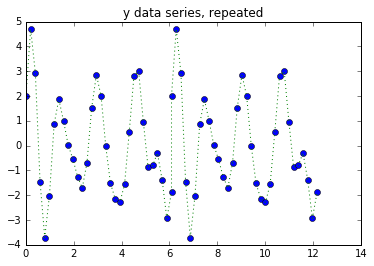

In [34]:
# Plot it, repeated since Fourier analysis assumes that
xx = concatenate((x, x+max(x)))
yy = concatenate((y, y       ))

# Plot the discrete values as dots '.', 
# connected by a dotted line ':'
figure(1)
plot(xx,yy,'o', label='raw')
plot(xx,yy,':', label='raw')
title('y data series, repeated');

## SFT = Slow Fourier Transform (illustration)

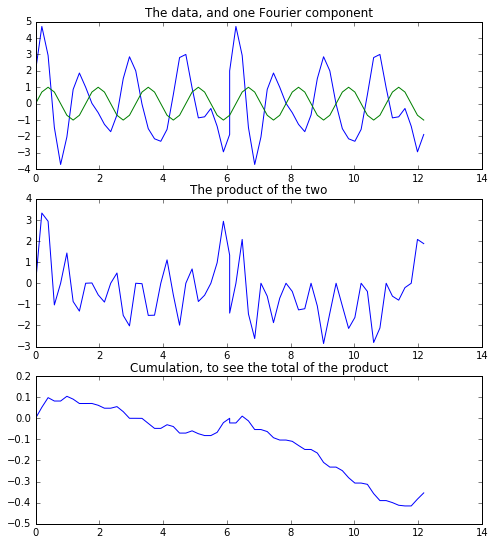

In [35]:
# Slow Fourier transform: mean of product of sin() and data
figure(13, figsize=(8, 9))

subplot(311)
plot(xx,yy)
title('The data, and one Fourier component')
plot(xx, sin(4*xx))

subplot(312)
product = yy * sin(4*xx)
plot(xx, product)
title('The product of the two')

subplot(313)
plot(xx, cumsum(product)/len(product))
title('Cumulation, to see the total of the product');

## Make the complex spectrum, using fft
...normalizing by input series length, since it makes no sense for the *values* of the spectrum in the plots to depend on sampling rate (and thus on N)

In [36]:
N = len(y) 
spec = fft.fft(y) /N

# Unpack in all the usual ways: real (cos) and imaginary (sin)
specr = real(spec)
speci = imag(spec)

# Unpack in all the usual ways: amplitude and phase
ampli = abs(spec)
phase = angle(spec)

## Plot real and imaginary parts
Should be symmetric since the input is real. 
But the mean of the data is in wavenumber 0 of the real (cosine) part.

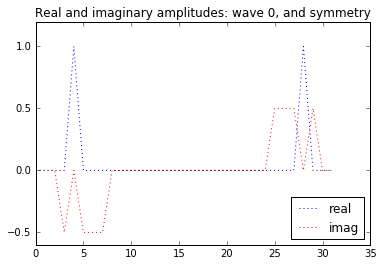

In [37]:
# Plot the real (blue) and imaginary (red) parts
figure(2)
#plot(specr,'bo', label='real')
plot(specr,'b:', label='real') # lines connecting DISCRETE points 
#plot(speci,'ro', label='imag')
plot(speci,'r:', label='imag') # lines are meaningless; for clarity
title('Real and imaginary amplitudes: wave 0, and symmetry')
legend(loc='best');

### Plot amplitude or *power* (amplitude squared) and phase
Should be symmetric since the input is real. 
But the mean of the data is in wavenumber 0 of the real (cosine) part.

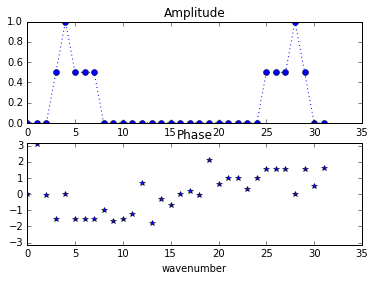

In [38]:
# Plot the amplitude and phase
figure(3)

subplot(211)
plot(ampli,'bo'); 
plot(ampli,'b:'); 
title('Amplitude')

subplot(212)
plot(phase   ,'b*')
title('Phase')
xlabel('wavenumber');
ylim([-pi,pi]);

### Tidy up the symmetry and labels for a nicer Power spectrum plot

In [39]:
# TAKE JUST THE LEFT HALF OF THE SYMMETRIC SPECTRUM
Wavenumbers = arange(N/2)

# BUT DOUBLE THE VALUEs, other than wavenumber 0
Amp2 = ampli[0:(N/2)] *2.
Amp2[0] = 0

# Now power spectrum density is amplitude squared
# But actually only 0.5x that, since var(sin(x))=var(cos(x))=0.5
Power = (Amp2**2) *0.5

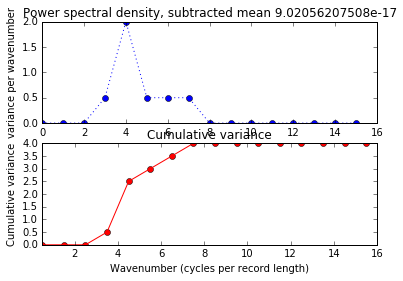

In [40]:
# Power spectral density plot
figure(4)
subplot(211)

plot(Wavenumbers,Power ,'bo')
plot(Wavenumbers,Power ,'b:')

title('Power spectral density, subtracted mean '+str(ampli[0]))
ylabel('variance per wavenumber');

# Cumulative power graph
CumWavenum  = concatenate(([-0.5],arange(N/2)+0.5))
CumVar      = concatenate(([0],   cumsum(Power) ))
                     
subplot(212)
plot(CumWavenum,CumVar,'ro')
plot(CumWavenum,CumVar,'r')
xlim([0.5,N/2])
title('Cumulative variance')
xlabel('Wavenumber (cycles per record length)')
ylabel('Cumulative variance');

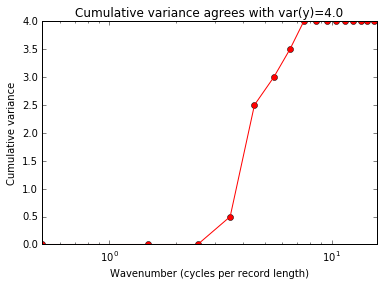

In [41]:
figure(5)
semilogx(CumWavenum,CumVar,'ro')
semilogx(CumWavenum,CumVar,'r')
xlim([0.5,N/2])
title('Cumulative variance agrees with var(y)='+ str(var(y)))
xlabel('Wavenumber (cycles per record length)')
ylabel('Cumulative variance');

In [42]:
print mean(y**2)
print var(y)

4.0
4.0


## Reconstruct (synthesize) data by meddling with phase. 
#### Notice that 1j is *i* in Python 

In [43]:
# Edit the spectrum's phase and amplitude:
syn_ampli = ampli

# Phase=0 gives the autocorrelation function
syn_phase = phase*0; explabel = 'phase =0'

# Phase = rand() makes synthetic data
#syn_phase = 2*pi*rand( len(phase) ); explabel = 'random phases'

### Build spectrum and invert, from edited amplitude and phase

In [44]:
# Build the synthetic spectrum from real and imaginary parts
syn_spec =(    syn_ampli*cos(syn_phase)   #real part
         + 1j* syn_ampli*sin(syn_phase) ) #imag part

# Synthesize back into physical space (time domain) with ifft: 
# First, we have to rescale by N = len(y). 
# And there is a near-zero imaginary part; strip it off with real()
syn_data = real( ifft(syn_spec)*N )

### Display the synthetic data 

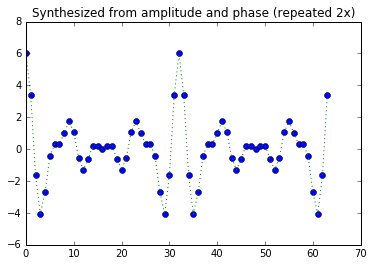

In [45]:
figure(6)
plot(tile(syn_data,2),'o')
plot(tile(syn_data,2),':')
title('Synthesized from amplitude and phase (repeated 2x)');

### Display the synthetic data on the raw data (Fig. 1)

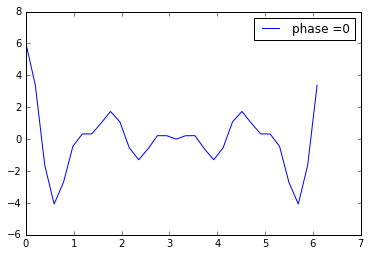

In [46]:
figure(1) # replot on top of the initial data plot (Fig. 1)
plot(x,syn_data, label=explabel)
legend(loc='best');